<a href="https://colab.research.google.com/github/yohanesnuwara/66DaysOfData/blob/main/D12_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with NLTK

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stop
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shortened dataset of Amazon Fine Food Review. 

In [ ]:
!wget https://github.com/yohanesnuwara/datasets/raw/master/Amazon_Fine_Food_Review.rar
!unrar x "/content/Amazon_Fine_Food_Review.rar" "/content"

--2021-07-16 03:52:32--  https://github.com/yohanesnuwara/datasets/raw/master/Amazon_Fine_Food_Review.rar
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yohanesnuwara/datasets/master/Amazon_Fine_Food_Review.rar [following]
--2021-07-16 03:52:32--  https://raw.githubusercontent.com/yohanesnuwara/datasets/master/Amazon_Fine_Food_Review.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19035248 (18M) [application/octet-stream]
Saving to: ‘Amazon_Fine_Food_Review.rar.1’

Amazon_Fine_Food_Re 100%[===================>]  18.15M  71.7MB/s    in 0.3s    

2021-07-16 03:52:32 (71.7 MB/s) - ‘Amazon_Fine

In [ ]:
df = pd.read_csv('Reviews2.csv').dropna()

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

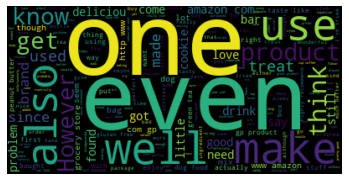

In [ ]:
# Create stopword list:
stopwords = set(stop.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

df[['Text', 'sentiment']]

,Text,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,-1
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,-1
4,Great taffy at a great price. There was a wid...,1
...,...,...
133983,"Lola loves them! Healthy and delicious treats,...",1
133984,My dogs love these treats! I tried other Zuke ...,1
133985,"My girls, a year-old mini Dachshund and an 8-y...",-1
133986,My dog can be picky when it comes to treats an...,1


In [ ]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

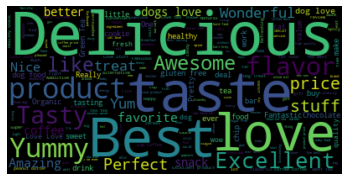

In [ ]:
stopwords = set(stop.words('english'))
stopwords.update(["br", "href","good","great"]) 

## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

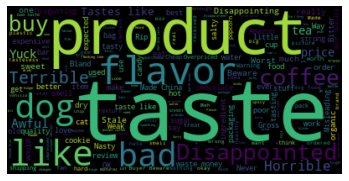

In [ ]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [ ]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,-1
4,Great taffy,1


In [ ]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [ ]:
# Logistic regression
lr = LogisticRegression()

# Split feature and target train test
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

# Fit the model
lr.fit(X_train,y_train)

# Make prediction
predictions = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# find accuracy, precision, recall:
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 2599,   560],
       [ 1575, 21486]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.62      0.82      0.71      3159
           1       0.97      0.93      0.95     23061

    accuracy                           0.92     26220
   macro avg       0.80      0.88      0.83     26220
weighted avg       0.93      0.92      0.92     26220



References:

* https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6